In [1]:
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 폰트 설정하는 법
### 아래 코드(리스트컴프리핸션) 실행하시면 폰트 위치 나옵니다.
### font_path에 폰트(nanum들어간.ttf 파일)찾아서 경로에 입력하시면 한글 나옵니다
- 저 같은 경우 윈도우 환경에서
- 'C:\\WINDOWS\\Fonts\\NanumGothic.otf'
- 라고 뜨길래
- font_path='C:WINDOWS/Fonts/NanumBarunGothic.ttf' 
- 라고 입력했습니다

In [2]:
[f.fname for f in matplotlib.font_manager.fontManager.ttflist]

['C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBol.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Oblique.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymReg.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmsy10.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmmi10.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-da

In [3]:


font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rc('font', family='NanumBarunGothic')

In [4]:
merged_df = pd.read_csv('../data/ott_time_label_encoded_updated_0106.csv')

In [5]:
print(merged_df.shape)
merged_df.head()

(5258, 5)


,성별,연령,ott 주중 이용시간대,ott 주말 이용시간대,연도
0,남,50세 이상,5,3,2020
1,남,40대,3,3,2019
2,남,50세 이상,0,6,2019
3,남,40대,6,5,2019
4,남,50세 이상,0,3,2019


In [6]:
merged_df[(merged_df['연령'] == '10대') & (merged_df['연도']==2019)]

,성별,연령,ott 주중 이용시간대,ott 주말 이용시간대,연도
5,남,10대,3,3,2019
15,남,10대,5,5,2019
21,남,10대,3,4,2019
26,남,10대,5,5,2019
27,남,10대,4,4,2019
...,...,...,...,...,...
3518,여,10대,6,6,2019
3521,여,10대,5,5,2019
3535,여,10대,0,3,2019
3562,여,10대,5,0,2019


In [7]:
merged_df.groupby(['연령', '성별', 'ott 주중 이용시간대']).count().head(10)

ott 주말 이용시간대  연도
연령  성별 ott 주중 이용시간대                  
10대 남  0                       10  10
       3                       14  14
       4                       23  23
       5                       37  37
       6                       75  75
       7                        7   7
    여  0                       23  23
       2                        1   1
       3                        9   9
       4                       20  20

- 10대 남자가 선호하는 시간대 위와 같이

10대 남,

10대 여,  x 5

# column별 데이터 타입 

In [8]:
merged_df.dtypes

성별              object
연령              object
ott 주중 이용시간대     int64
ott 주말 이용시간대     int64
연도               int64
dtype: object

In [9]:
print(f'{merged_df.columns[0]} : {type(merged_df.iloc[0,0])}')
print(f'{merged_df.columns[1]} : {type(merged_df.iloc[0,1])}')
print(f'{merged_df.columns[2]} : {type(merged_df.iloc[0,2])}')
print(f'{merged_df.columns[3]} : {type(merged_df.iloc[0,3])}')
print(f'{merged_df.columns[4]} : {type(merged_df.iloc[0,4])}')

성별 : <class 'str'>
연령 : <class 'str'>
ott 주중 이용시간대 : <class 'numpy.int64'>
ott 주말 이용시간대 : <class 'numpy.int64'>
연도 : <class 'numpy.int64'>


In [10]:
ott_time_dict = {'이용하지 않음' : 0, '6:00~8:59' : 1, '9:00~11:59' : 2, '12:00~14:59': 3,
                 '15:00~17:59': 4, '18:00~20:59': 5, '21:00~23:59': 6, '24:00~5:59': 7}

In [11]:
old_order = ['6:00~8:59',
 '9:00~11:59',
 '12:00~14:59',
 '15:00~17:59',
 '18:00~20:59',
 '21:00~23:59',
 '24:00~5:59',
 '이용하지 않음']

In [12]:
order = [1, 2, 3, 4, 5, 6, 7, 0]

# 나이대별 주중, 주말 ott 이용시간 

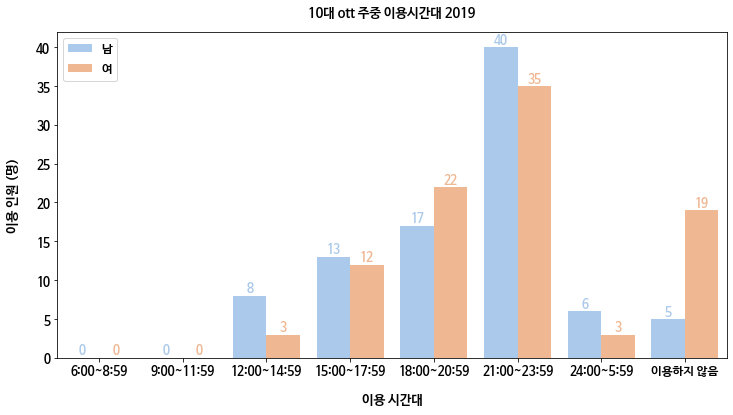

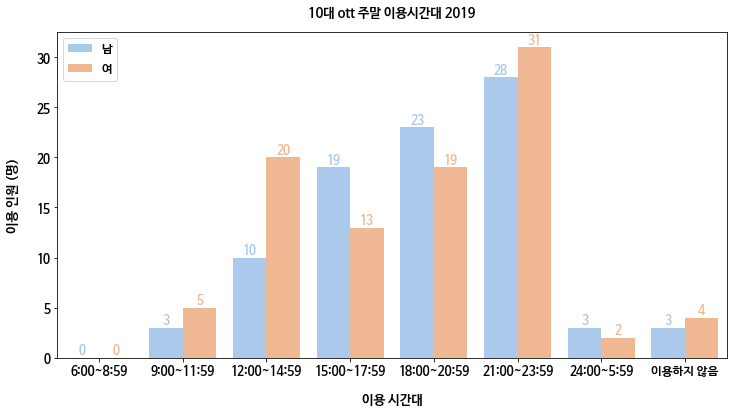

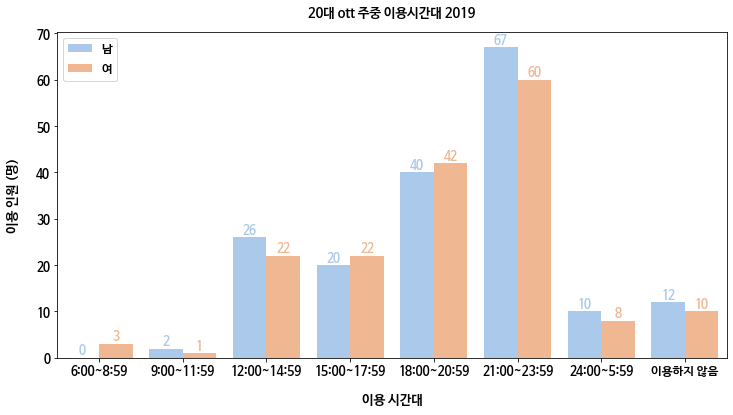

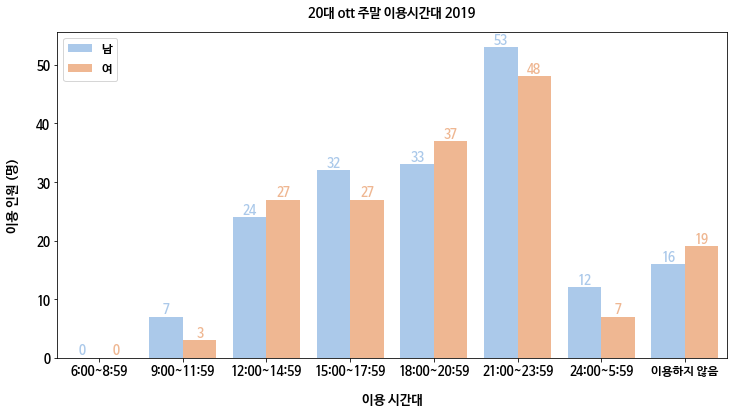

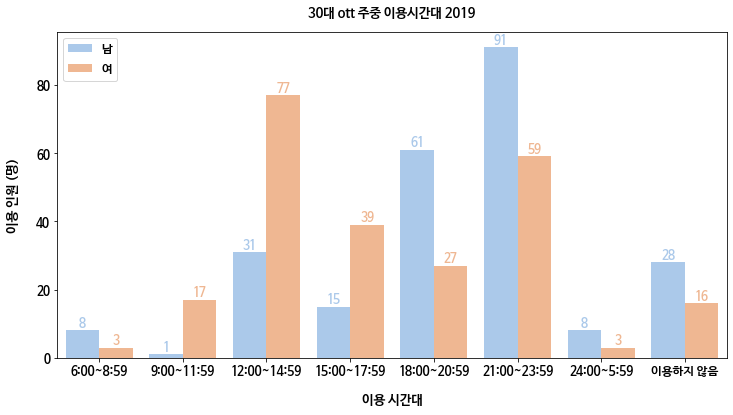

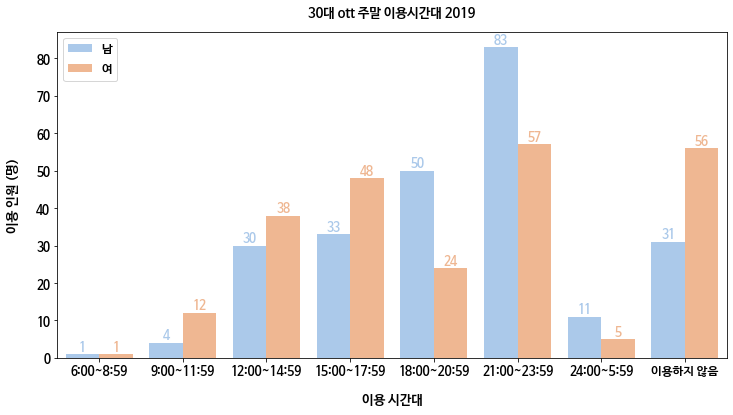

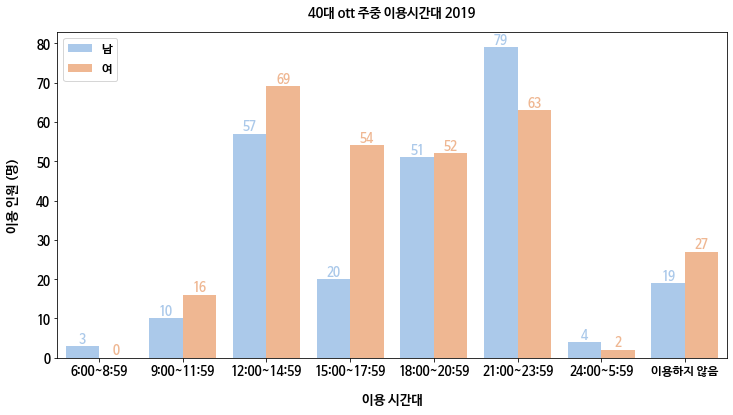

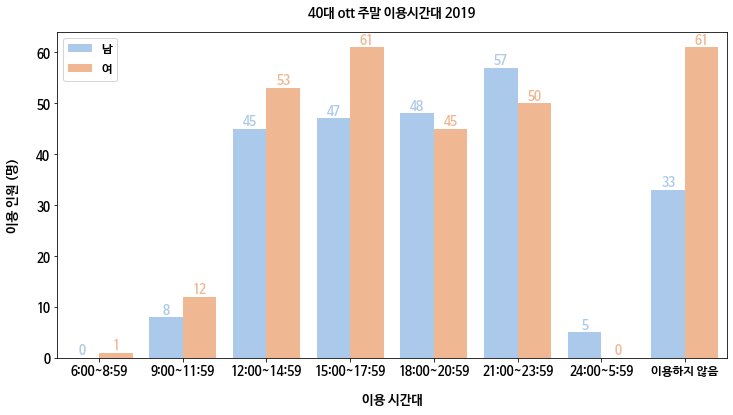

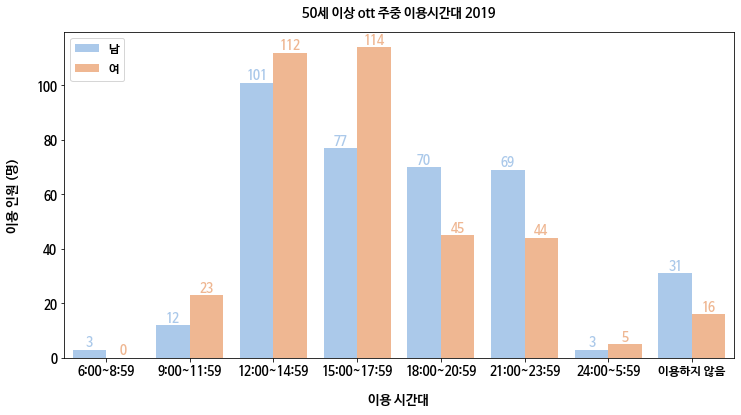

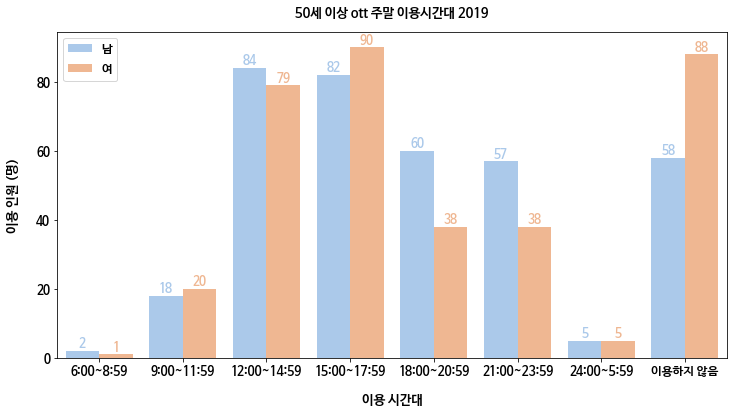

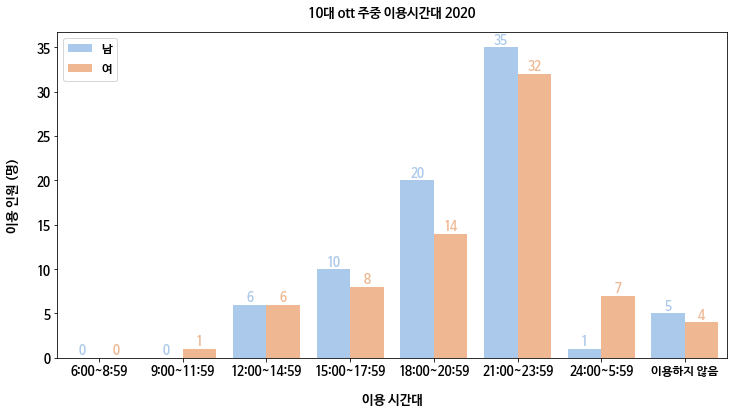

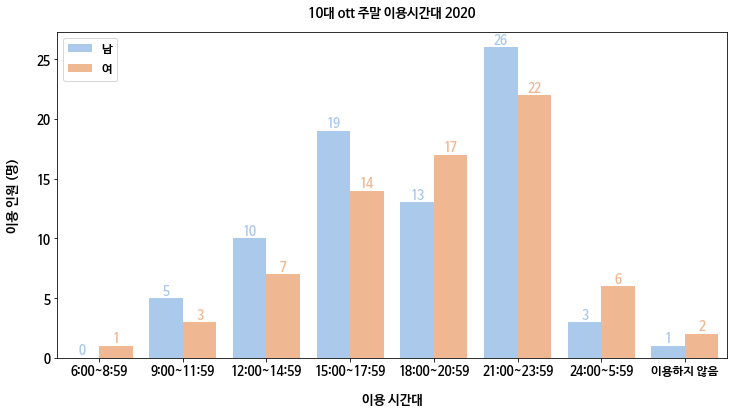

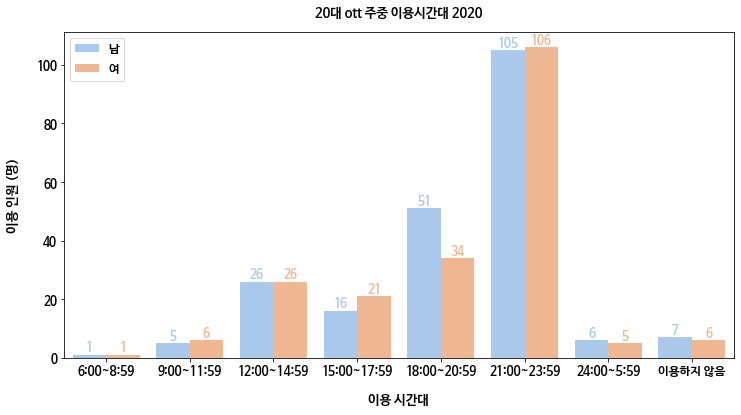

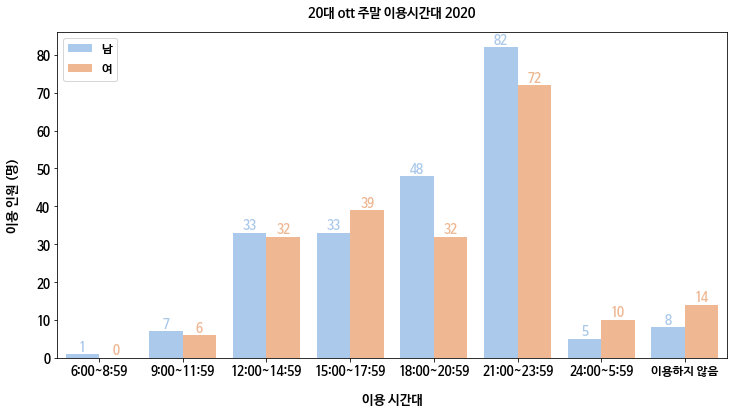

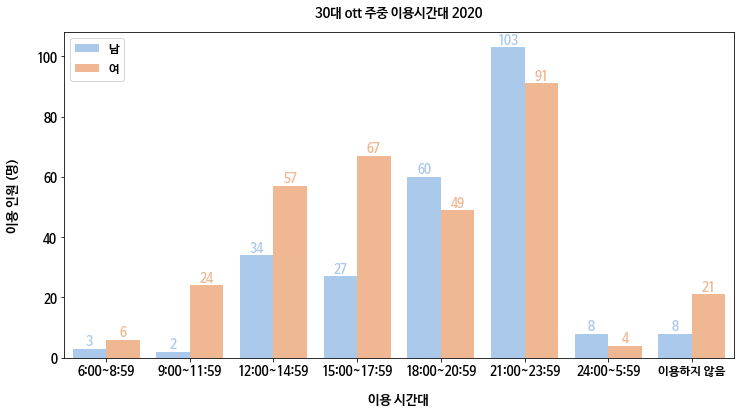

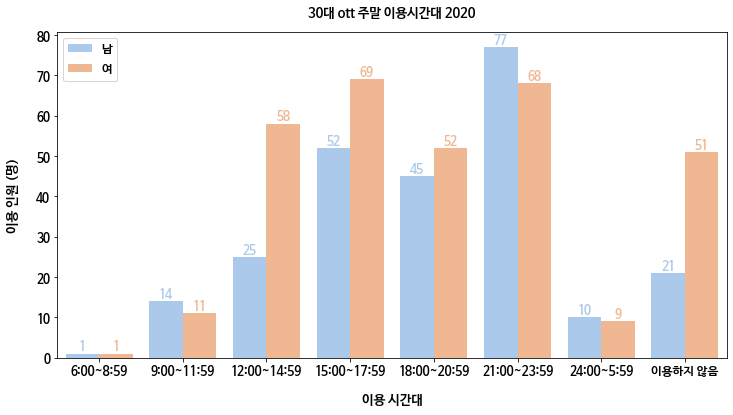

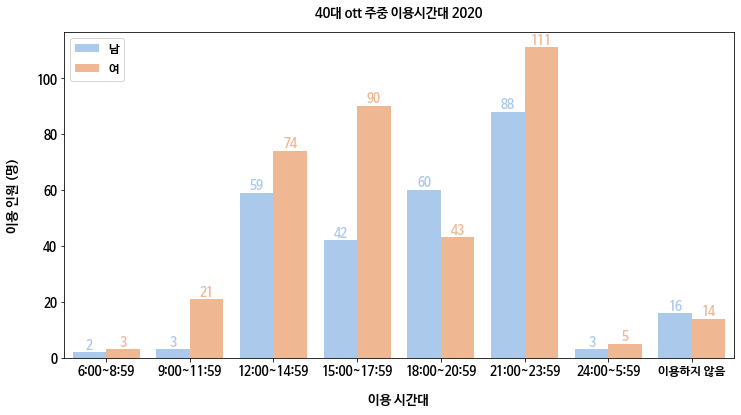

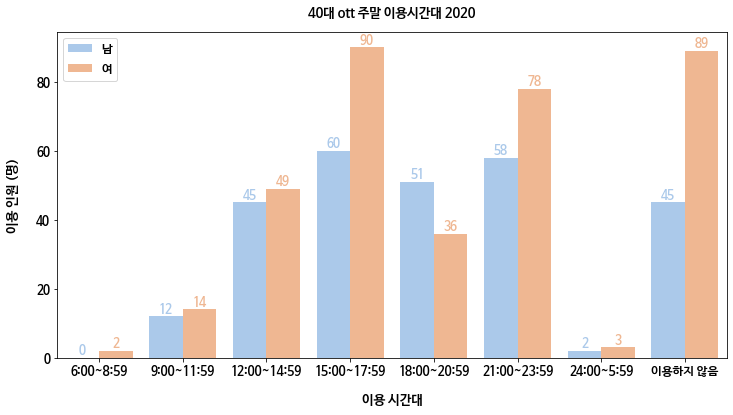

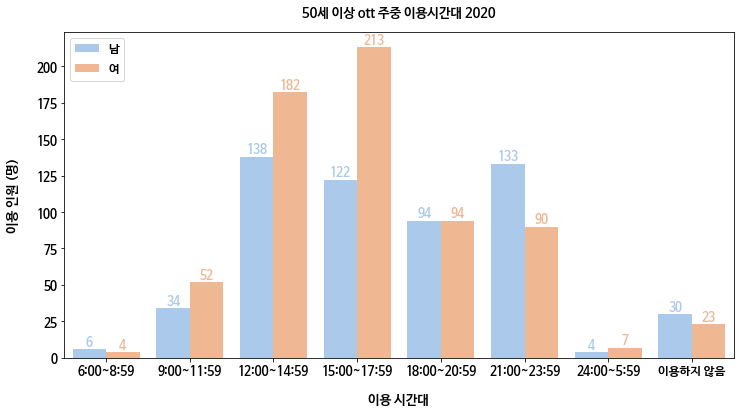

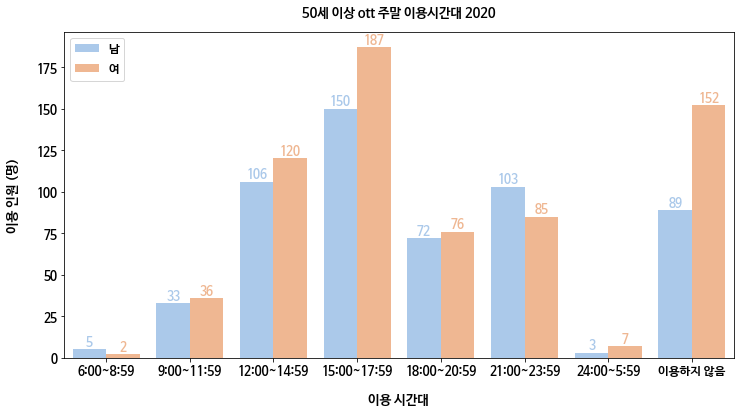

In [66]:
target_age_list = ['10대', '20대', '30대', '40대', '50세 이상']
year_list = [2019, 2020]
weekday_or_weekend = ['주중', '주말'] 

plt.rc('font', family='NanumBarunGothic')
font = {'weight':'bold', 'size':12}
plt.rc('font', **font)
for target_year in year_list:
    for target_age in target_age_list:
        for what_day in weekday_or_weekend:
            fig, ax = plt.subplots(figsize=(12,6))
            sns.set_palette('pastel')
            sns.countplot(x=f'ott {what_day} 이용시간대', hue='성별',
                          order=order, data=merged_df[(merged_df['연령'] == target_age) & (merged_df['연도']==target_year)])
            ax.set_title(f'{target_age} ott {what_day} 이용시간대 {target_year}', pad=15, weight='bold', fontsize=13)
            ax.set_xlabel('이용 시간대', labelpad=15, weight='bold', fontsize=13)
            ax.set_ylabel('이용 인원 (명)', labelpad=15, weight='bold', fontsize=13)

            ax.set_xticklabels(old_order)
                    # legend
            ax.legend(loc='upper left')

            for bar in ax.patches:
                # The text annotation for each bar should be its height.
                bar_value = bar.get_height()
                # Format the text with commas to separate thousands. You can do
                # any type of formatting here though.
                if bar_value > 0:
                    text = f'{int(bar_value):,}'
                    text_y = bar.get_y() + bar_value
                else:
                    text = 0
                    text_y = 0

                text_x = bar.get_x() + bar.get_width() / 2

                bar_color = bar.get_facecolor()
                ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                      size=12)
#             if target_age == '50세 이상':
#                 plt.savefig(f'../data/ott_png/age_ott_50대_{what_day}_{target_year}', dpi=300, bbox_inches='tight', pad_inches=0.1) # , bbox_inches='tight'
#             else :
#                 plt.savefig(f'../data/ott_png/age_ott_{target_age}_{what_day}_{target_year}', dpi=300, bbox_inches='tight', pad_inches=0.1) # , bbox_inches='tight'

# 나이대별 투명버전


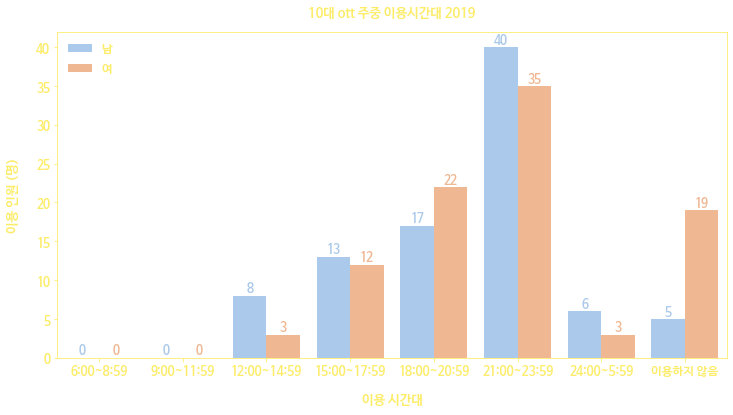

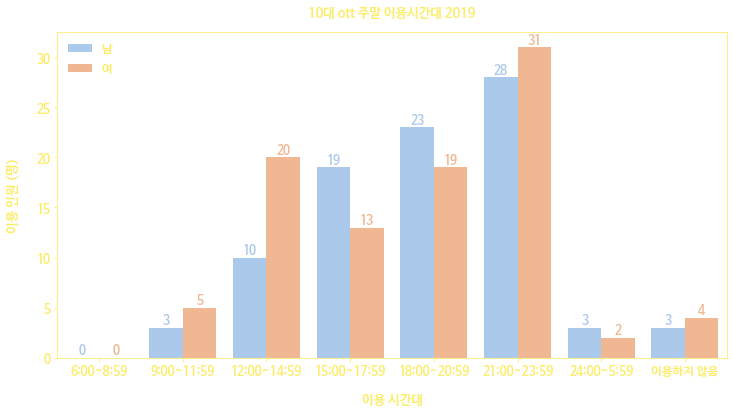

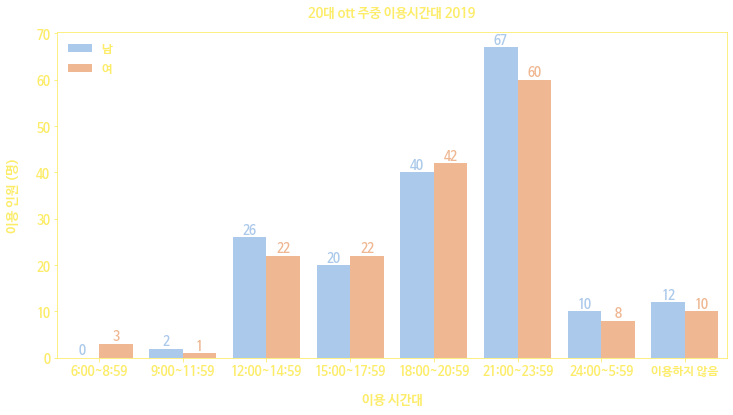

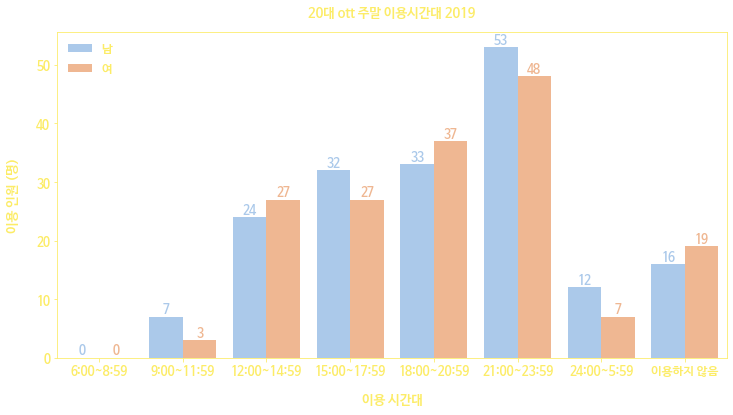

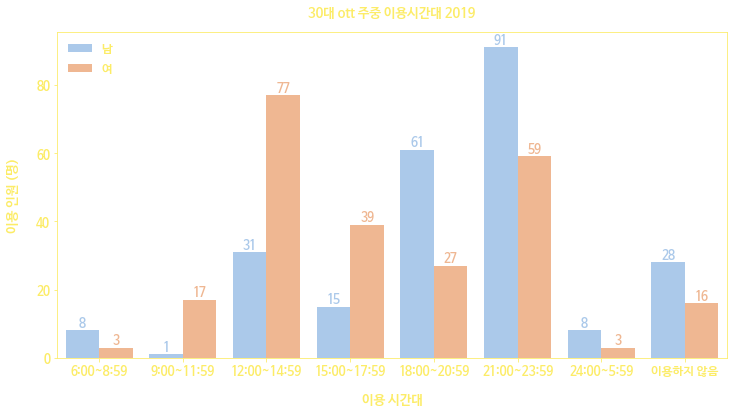

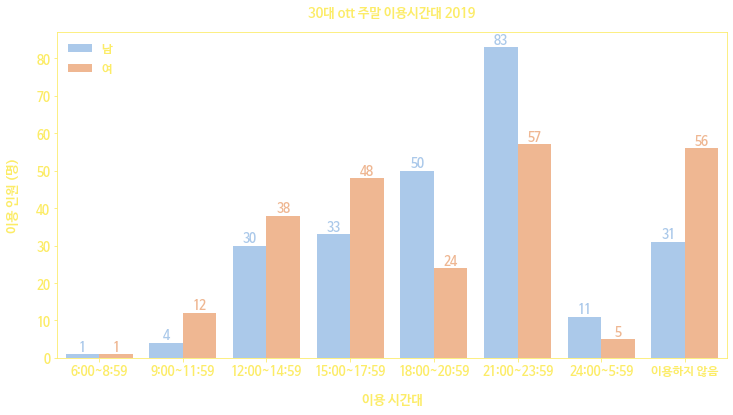

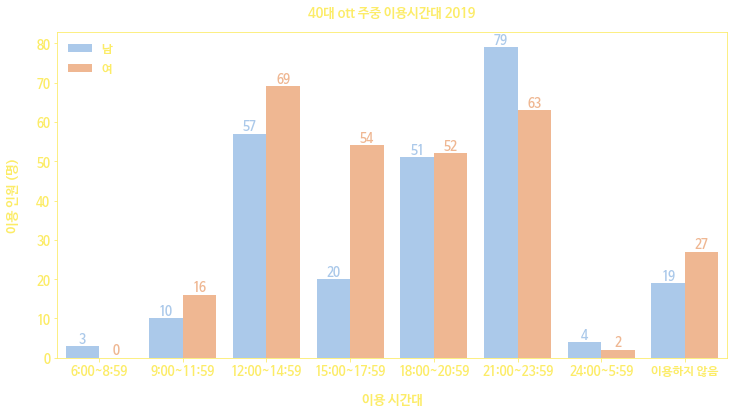

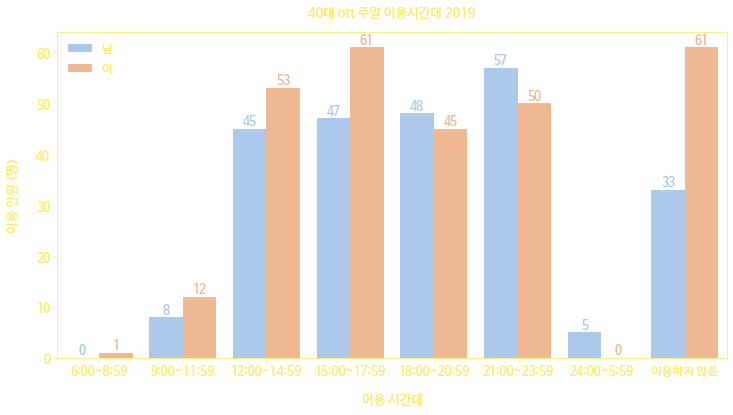

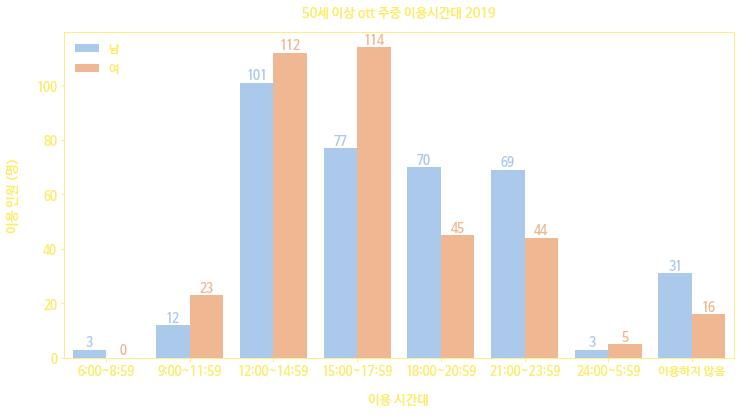

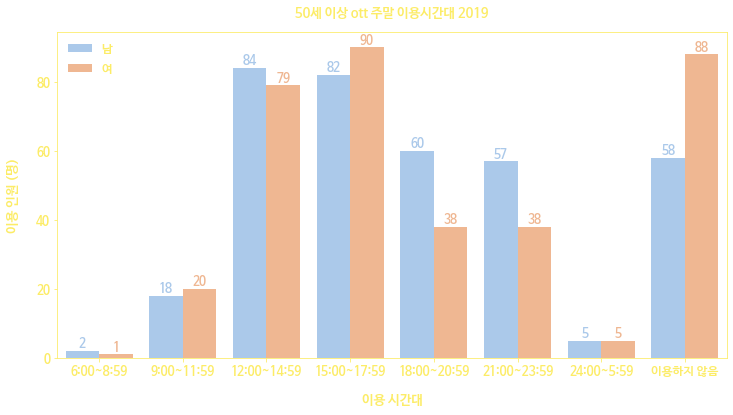

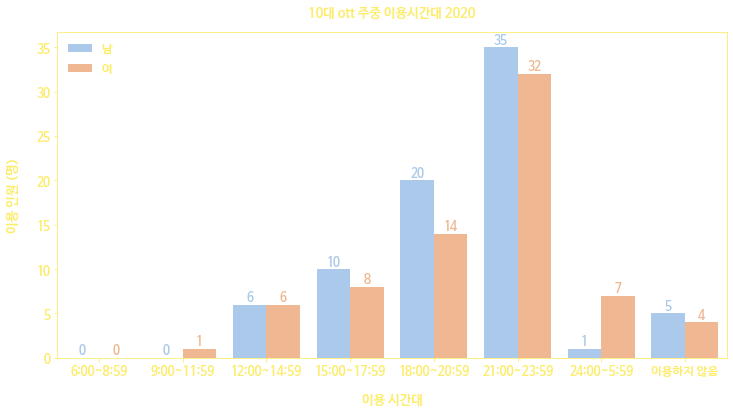

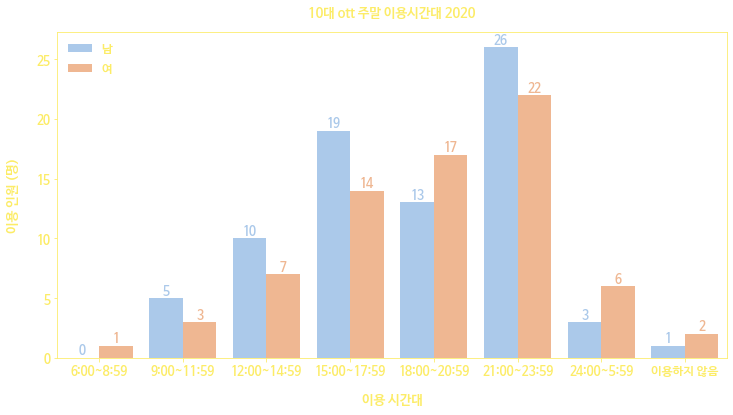

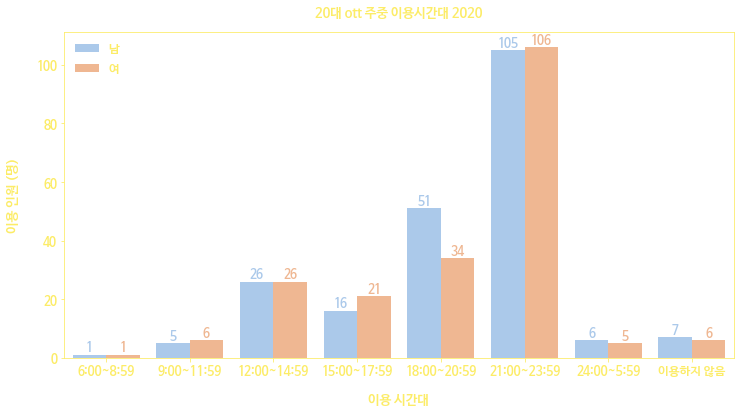

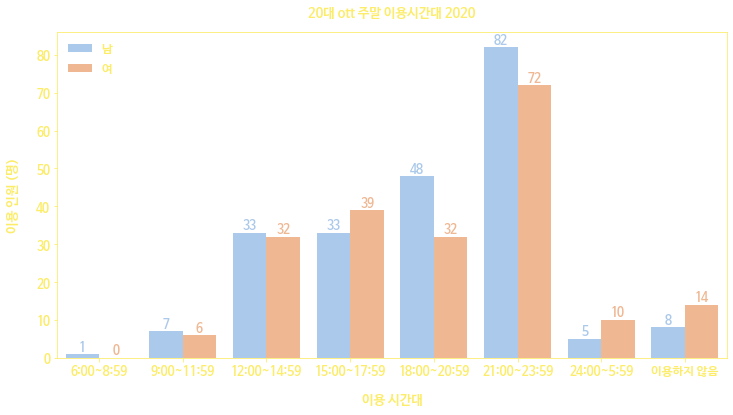

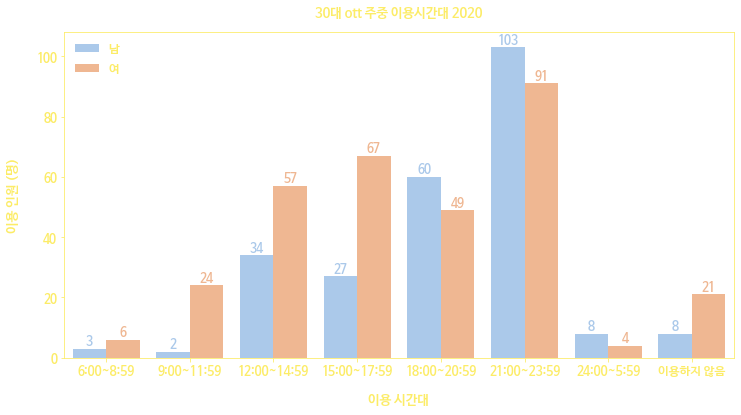

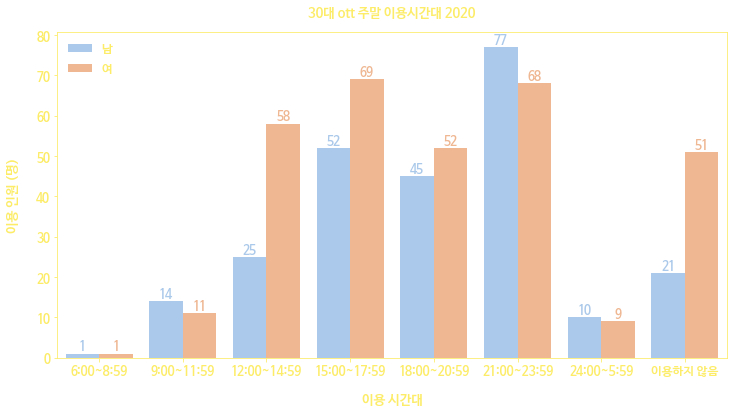

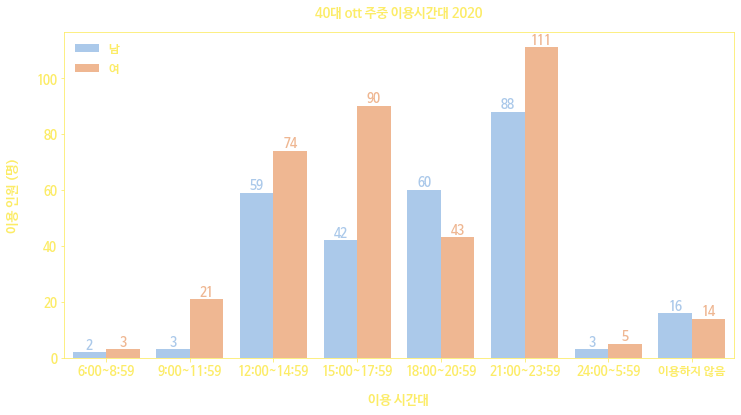

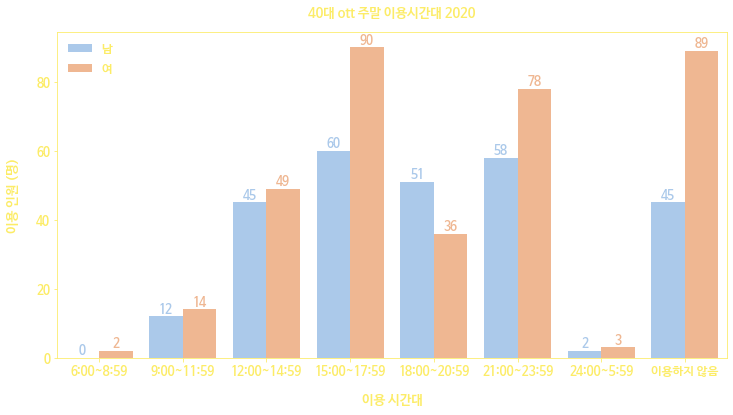

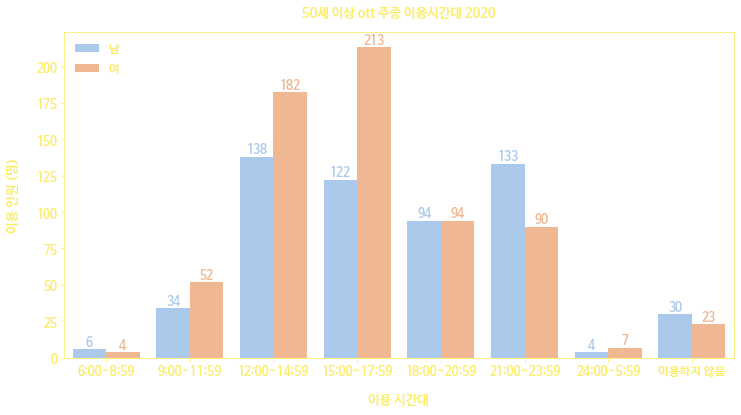

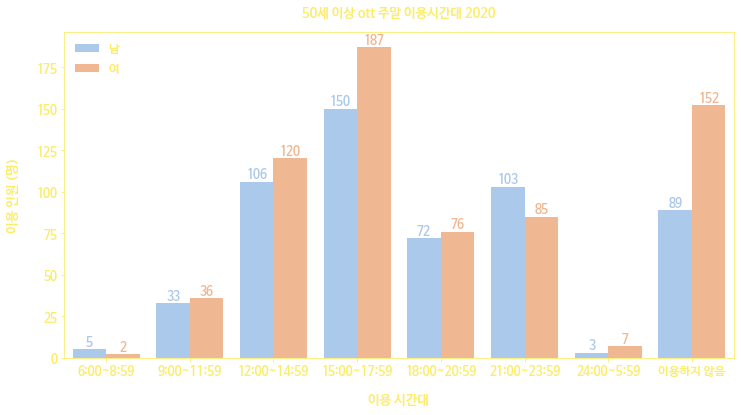

In [70]:
target_age_list = ['10대', '20대', '30대', '40대', '50세 이상']
year_list = [2019, 2020]
weekday_or_weekend = ['주중', '주말'] 

plt.rc('font', family='NanumBarunGothic')
font = {'weight':'bold', 'size':12}
plt.rc('font', **font)
for target_year in year_list:
    for target_age in target_age_list:
        for what_day in weekday_or_weekend:
            fig, ax = plt.subplots(figsize=(12,6))
            sns.set_palette('pastel')
            sns.countplot(x=f'ott {what_day} 이용시간대', hue='성별',
                          order=order, data=merged_df[(merged_df['연령'] == target_age) & (merged_df['연도']==target_year)])
            ax.set_title(f'{target_age} ott {what_day} 이용시간대 {target_year}', pad=15, weight='bold', fontsize=13, color=color)
            ax.set_xlabel('이용 시간대', labelpad=15, weight='bold', fontsize=13, color=color)
            ax.set_ylabel('이용 인원 (명)', labelpad=15, weight='bold', fontsize=13, color=color)

            ax.set_xticklabels(old_order)
                    # legend
#             ax.legend(loc='upper left')

            # 그래프 테두리 색깔
            ax.spines['top'].set_color(color)
            ax.spines['bottom'].set_color(color)
            ax.spines['left'].set_color(color)
            ax.spines['right'].set_color(color)
            ax.tick_params(colors=color)

            # x 라벨 자동변환
            ax.set_xticklabels(old_order)

            # legend
            l = ax.legend(loc='upper left', edgecolor=color, frameon=False) # frameon : transparency

            for text in l.get_texts():
                text.set_color(color)
            
            for bar in ax.patches:
                # The text annotation for each bar should be its height.
                bar_value = bar.get_height()
                # Format the text with commas to separate thousands. You can do
                # any type of formatting here though.
                if bar_value > 0:
                    text = f'{int(bar_value):,}'
                    text_y = bar.get_y() + bar_value
                else:
                    text = 0
                    text_y = 0

                text_x = bar.get_x() + bar.get_width() / 2

                bar_color = bar.get_facecolor()
                ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                      size=12)
#             if target_age == '50세 이상':
#                 plt.savefig(f'../data/ott_png/age_ott_50대_{what_day}_{target_year}',
#                             dpi=300, bbox_inches='tight', pad_inches=0.1, transparent=True) # , bbox_inches='tight'
#             else :
#                 plt.savefig(f'../data/ott_png/age_ott_{target_age}_{what_day}_{target_year}'
#                             , dpi=300, bbox_inches='tight', pad_inches=0.1, transparent=True) # , bbox_inches='tight'

# 성별별 ott 주중, 주말 이용시간 

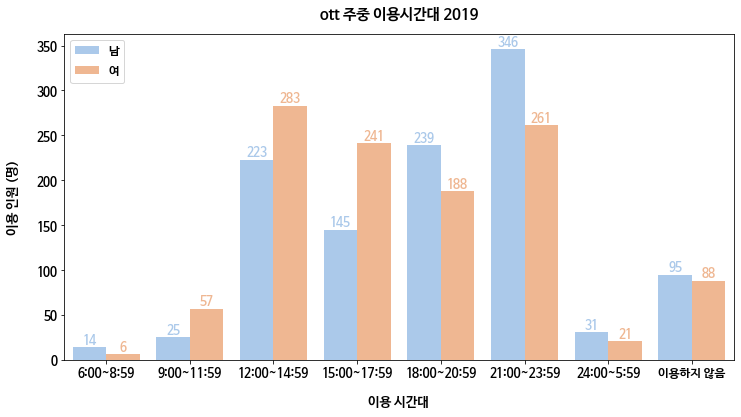

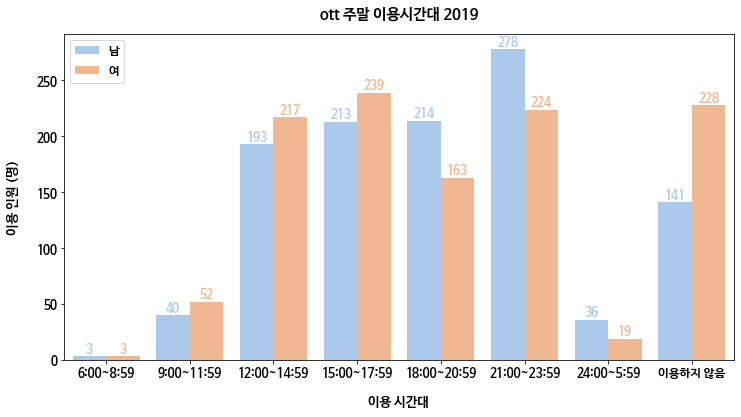

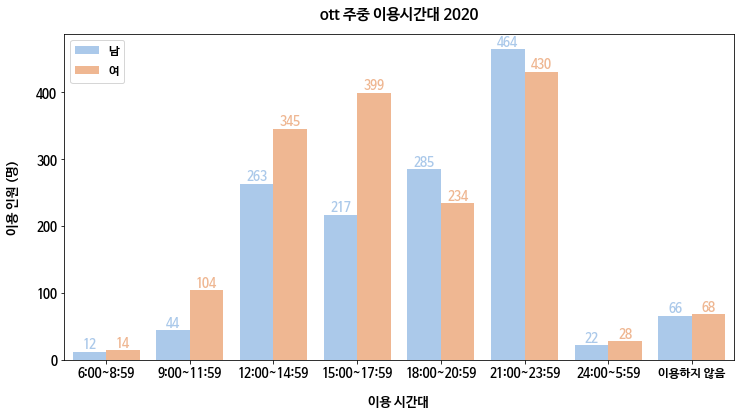

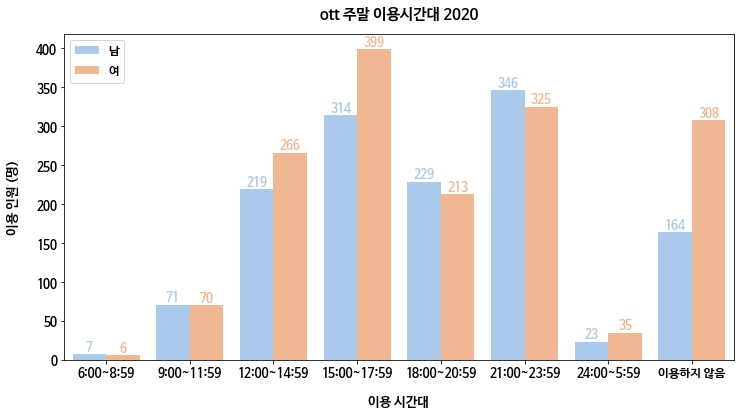

In [53]:
year_list = [2019, 2020]
weekday_or_weekend = ['주중', '주말']
font = {'weight':'bold', 'size':12}
plt.rc('font', **font)
color = '#FCEC67'
for target_year in year_list:
    for what_day in weekday_or_weekend:
        plt.rc('font', **font)
        fig, ax = plt.subplots(figsize=(12,6))
        sns.set_palette('pastel')
        sns.countplot(x=f'ott {what_day} 이용시간대', hue='성별', order=order, data=merged_df[merged_df['연도'] == target_year])
#         plt.title(f'남녀별 ott {what_day} 이용시간대 {target_year}')
        
        ax.set_title(f'ott {what_day} 이용시간대 {target_year}', pad=15, weight='bold', fontsize=15)
        ax.set_xlabel('이용 시간대', labelpad=15, weight='bold', fontsize=13)
        ax.set_ylabel('이용 인원 (명)', labelpad=15, weight='bold', fontsize=13)
#         ax.set_ylabel('이용 인원 (명)', labelpad=15, weight='bold', fontsize=13, color='seashell')
        
        # 그래프 테두리 색깔
#         ax.spines['top'].set_color('seashell')
        
        # x 라벨 자동변환
        ax.set_xticklabels(old_order)
        
        # legend
        ax.legend(loc='upper left')

        for bar in ax.patches:
            # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            if bar_value > 0:
                text = f'{int(bar_value):,}'
                text_y = bar.get_y() + bar_value
            else:
                text = 0
                text_y = 0

            text_x = bar.get_x() + bar.get_width() / 2
 
            bar_color = bar.get_facecolor()
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                  size=12)
        
        # 그림의 배경까지 투명하게 transparent
#         plt.savefig(f'../data/ott_png/ott_{what_day}_{target_year}', dpi=300,
#                     bbox_inches='tight', pad_inches=0.1, transparent=True) # , bbox_inches='tight'

# 투명버전

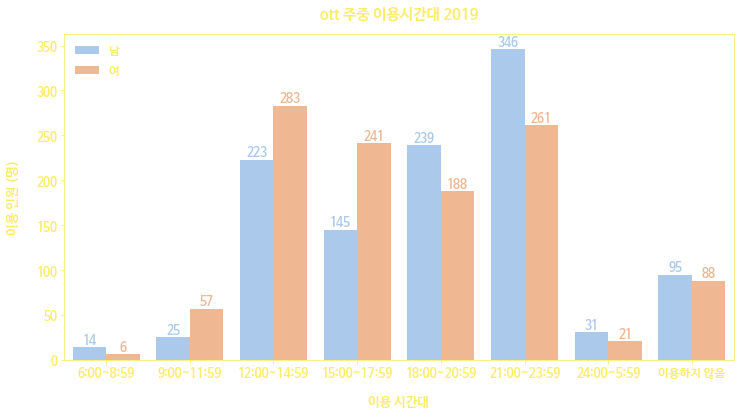

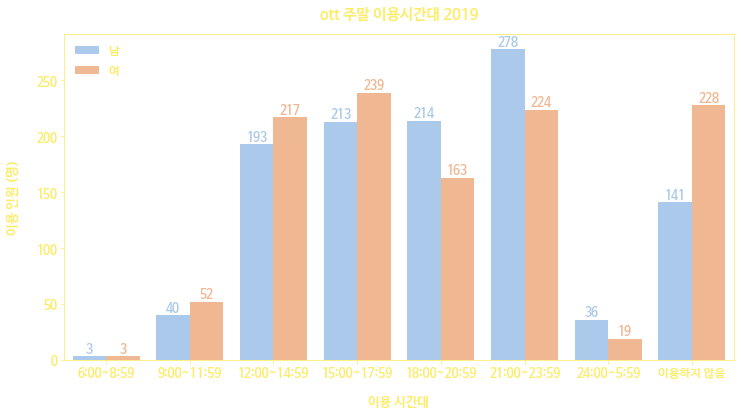

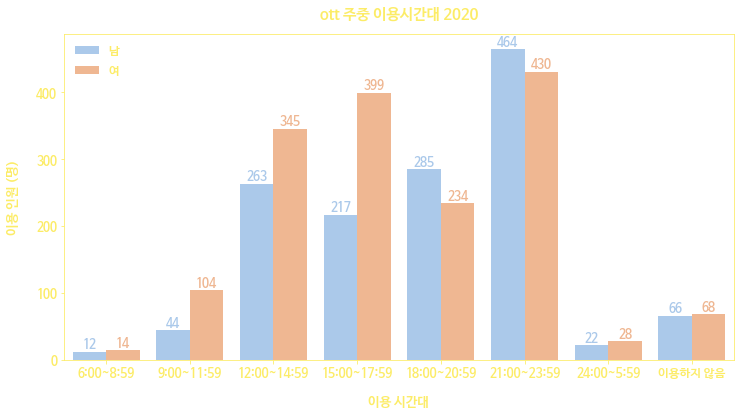

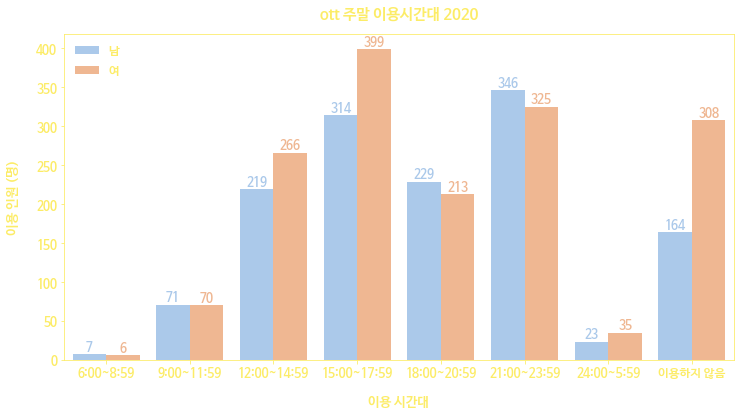

In [64]:
year_list = [2019, 2020]
weekday_or_weekend = ['주중', '주말']
font = {'weight':'bold', 'size':12}
plt.rc('font', **font)
color = '#FCEC67'
for target_year in year_list:
    for what_day in weekday_or_weekend:
        plt.rc('font', **font)
        fig, ax = plt.subplots(figsize=(12,6))
        sns.set_palette('pastel')
        sns.countplot(x=f'ott {what_day} 이용시간대', hue='성별', order=order, data=merged_df[merged_df['연도'] == target_year])
#         plt.title(f'남녀별 ott {what_day} 이용시간대 {target_year}')
        
        ax.set_title(f'ott {what_day} 이용시간대 {target_year}', pad=15, weight='bold', fontsize=15, color=color)
        ax.set_xlabel('이용 시간대', labelpad=15, weight='bold', fontsize=13, color=color)
        ax.set_ylabel('이용 인원 (명)', labelpad=15, weight='bold', fontsize=13, color=color)
#         ax.set_ylabel('이용 인원 (명)', labelpad=15, weight='bold', fontsize=13, color='seashell')
        
        # 그래프 테두리 색깔
        ax.spines['top'].set_color(color)
        ax.spines['bottom'].set_color(color)
        ax.spines['left'].set_color(color)
        ax.spines['right'].set_color(color)
        ax.tick_params(colors=color)
        
        # x 라벨 자동변환
        ax.set_xticklabels(old_order)
        
        # legend
        l = ax.legend(loc='upper left', edgecolor=color, frameon=False) # frameon : transparency
        
        for text in l.get_texts():
            text.set_color(color)
        

        for bar in ax.patches:
            # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            if bar_value > 0:
                text = f'{int(bar_value):,}'
                text_y = bar.get_y() + bar_value
            else:
                text = 0
                text_y = 0

            text_x = bar.get_x() + bar.get_width() / 2
 
            bar_color = bar.get_facecolor()
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                  size=12)
        
        # 그림의 배경까지 투명하게 transparent
#         plt.savefig(f'../data/ott_png/ott_{what_day}_{target_year}', dpi=300,
#                     bbox_inches='tight', pad_inches=0.1, transparent=True) # , bbox_inches='tight'

#  연도별 성비

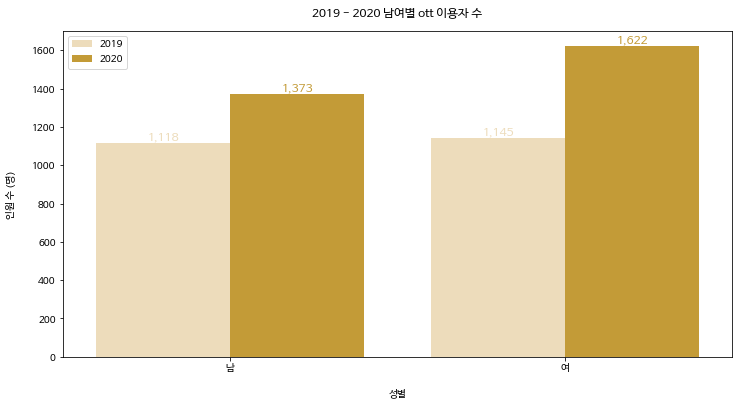

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set_palette("hls", n_colors=4)
sns.countplot(x='성별', hue='연도', data=merged_df, palette=['wheat', 'goldenrod'])
# plt.title('10대 ott 주중 이용시간대')
ax.set_xlabel('성별', labelpad=15)
ax.set_ylabel('인원 수 (명)', labelpad=15)
ax.set_title(f'2019 - 2020 남여별 ott 이용자 수', pad=15)


# legend
ax.legend(loc='upper left')

for bar in ax.patches:
    # The text annotation for each bar should be its height.
    bar_value = bar.get_height()
    # Format the text with commas to separate thousands. You can do
    # any type of formatting here though.
    if bar_value > 0:
        text = f'{int(bar_value):,}'
        text_y = bar.get_y() + bar_value
    else:
        text = 0
        text_y = 0

    # This will give the middle of each bar on the x-axis.
    text_x = bar.get_x() + bar.get_width() / 2
    # get_y() is where the bar starts so we add the height to it.

#         text_y = bar.get_y() + bar_value

    # If we want the text to be the same color as the bar, we can
    # get the color like so:
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

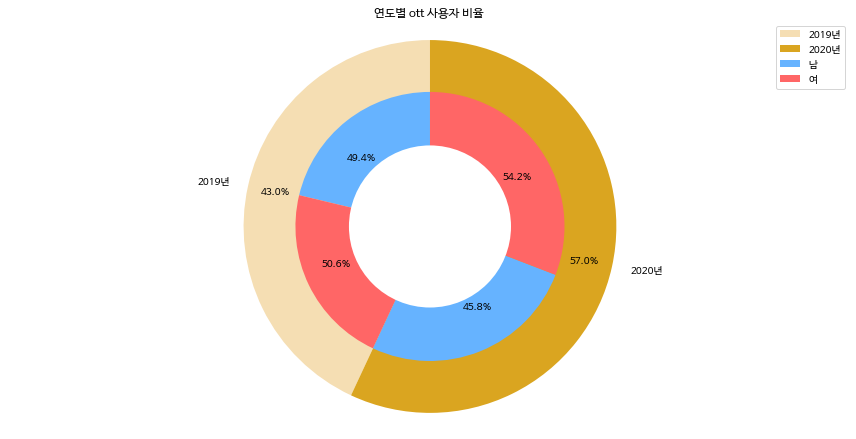

In [16]:

num_2019 = merged_df[merged_df['연도'] == 2019 ]['성별'].count()
num_2020 = merged_df[merged_df['연도'] == 2020 ]['성별'].count()

num_male_2019 = merged_df[(merged_df['성별'] == '남') & (merged_df['연도'] == 2019)]['성별'].count()
num_female_2019 = merged_df[(merged_df['성별'] == '여') & (merged_df['연도'] == 2019)]['성별'].count()
num_male_2020 = merged_df[(merged_df['성별'] == '남') & (merged_df['연도'] == 2020)]['성별'].count()
num_female_2020 = merged_df[(merged_df['성별'] == '여') & (merged_df['연도'] == 2020)]['성별'].count()


num_male_pct_2019 = round((num_male_2019/(num_male_2019+num_female_2019))*100,1)
num_female_pct_2019 = round((num_female_2019/(num_male_2019+num_female_2019))*100,1)
num_male_pct_2020 = round((num_male_2020/(num_male_2020+num_female_2020))*100,1)
num_female_pct_2020 = round((num_female_2020/(num_male_2020+num_female_2020))*100,1)


fig, ax = plt.subplots(figsize=(12,6))


    # Pie chart
labels = ['2019년', '2020년']
sizes = [num_2019, num_2020]
    #colors
colors = ['wheat', 'goldenrod']
#explsion
# explode = (0.05, 0.05)

sizes_gender = [num_male_2019, num_female_2019, num_male_2020, num_female_2020]
labels_gender = [f'{num_male_pct_2019}%', f'{num_female_pct_2019}%', f'{num_male_pct_2020}%', f'{num_female_pct_2020}%']
colors_gender = ['#66b3ff', '#ff6666', '#66b3ff', '#ff6666']
 
pie1 = plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', radius=1.15, startangle=90, pctdistance=0.85)
# plt.pie(sizes_gender, colors=colors_gender, autopct='%1.1f%%', radius=0.83, startangle=90, pctdistance=0.75)
pie2 = plt.pie(sizes_gender, colors=colors_gender, labels=labels_gender, radius=0.83, startangle=90, labeldistance=0.65)




#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
centre_circle.set_alpha(1.0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.title('연도별 ott 사용자 비율')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:], ['2019년', '2020년', '남', '여'])

plt.show()